In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import re
from scipy import fft
%matplotlib inline

# Load medidas - Amplitud

In [2]:
folder="Frecs/"

In [3]:
filenames=["100.0Hz_0.1VPP_delay100.dat","100.0Hz_5VPP_delay100.dat",
           "100.0Hz_7VPP_delay100.dat"]

In [4]:
nfreq=len(filenames)
data=[]
for i in range(nfreq):
    print("open: ",filenames[i])
    dumm=np.loadtxt(folder+filenames[i],delimiter=" ")
    data.append(dumm)

open:  100.0Hz_0.1VPP_delay100.dat
open:  100.0Hz_5VPP_delay100.dat
open:  100.0Hz_7VPP_delay100.dat


In [5]:
rate=9615 # hz
samples=np.linspace(0,99,num=100)
time=samples/rate

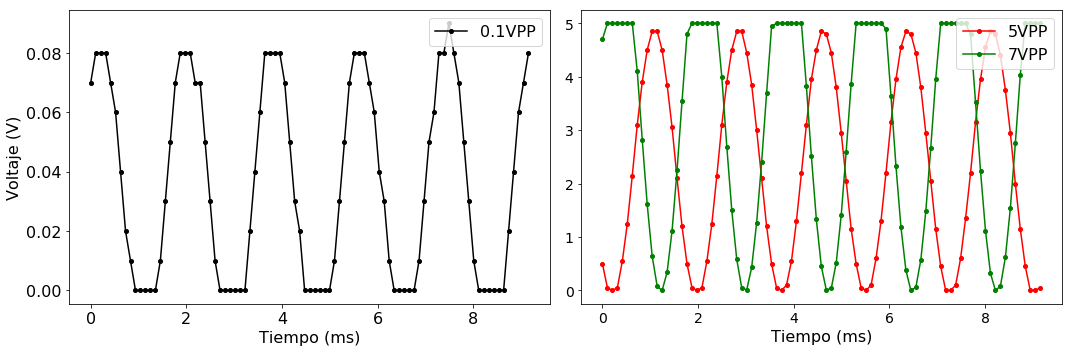

In [6]:
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot(121)
ax1.plot(time[0:99-10]*1e3,data[0][0:99-10],marker='o',color='k',linestyle='solid',markersize=4,label='0.1VPP')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.legend(loc='upper right',fontsize=16)
ax1.set_xlabel("Tiempo (ms)",fontsize=16)
ax1.set_ylabel("Voltaje (V)",fontsize=16)
ax2=plt.subplot(122)
ax2.plot(time[0:99-10]*1e3,data[1],marker='o',color='r',linestyle='solid',markersize=4,label='5VPP')
ax2.plot(time[0:99-10]*1e3,data[2][0:99-10],marker='o',color='g',linestyle='solid',markersize=4,label='7VPP')
ax2.legend(loc='upper right',fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xlabel("Tiempo (ms)",fontsize=16)
plt.tight_layout()
plt.savefig("amplitud_arduino.jpg")
plt.show()

In [7]:
len(data[0])

100

# Load medidas - Frecuencias

In [7]:
folder10='freqarduino/Delay010/'
filenames10=['Freq-5Vpp-Off2.5-050Hz.txt',
             'Freq-5Vpp-Off2.5-070Hz.txt',
             'Freq-5Vpp-Off2.5-080Hz.txt',
             'Freq-5Vpp-Off2.5-090Hz.txt',
             'Freq-5Vpp-Off2.5-100Hz.txt',
             'Freq-5Vpp-Off2.5-200Hz.txt',
             'Freq-5Vpp-Off2.5-300Hz.txt',
             'Freq-5Vpp-Off2.5-400Hz.txt',
             'Freq-5Vpp-Off2.5-500Hz.txt',
             'Freq-5Vpp-Off2.5-600Hz.txt',
             'Freq-5Vpp-Off2.5-700Hz.txt',
             'Freq-5Vpp-Off2.5-800Hz.txt',
             'Freq-5Vpp-Off2.5-900Hz.txt',
             'Freq-5Vpp-Off2.5-1000Hz.txt']

In [8]:
nfreq10=len(filenames10)
time10=[]
data10=[]
for i in range(nfreq10):
    print("open: ",filenames10[i])
    time, wave=np.loadtxt(folder10+filenames10[i],dtype="float64",unpack=True)
    time10.append(time)
    data10.append(wave)

open:  Freq-5Vpp-Off2.5-050Hz.txt
open:  Freq-5Vpp-Off2.5-070Hz.txt
open:  Freq-5Vpp-Off2.5-080Hz.txt
open:  Freq-5Vpp-Off2.5-090Hz.txt
open:  Freq-5Vpp-Off2.5-100Hz.txt
open:  Freq-5Vpp-Off2.5-200Hz.txt
open:  Freq-5Vpp-Off2.5-300Hz.txt
open:  Freq-5Vpp-Off2.5-400Hz.txt
open:  Freq-5Vpp-Off2.5-500Hz.txt
open:  Freq-5Vpp-Off2.5-600Hz.txt
open:  Freq-5Vpp-Off2.5-700Hz.txt
open:  Freq-5Vpp-Off2.5-800Hz.txt
open:  Freq-5Vpp-Off2.5-900Hz.txt
open:  Freq-5Vpp-Off2.5-1000Hz.txt


In [9]:
inpfreq10=[]
for i in range(nfreq10):
    iini=17
    ifin=len(filenames10[i])-6
    infreq=float(filenames10[i][iini:ifin])
    inpfreq10.append(infreq)

In [10]:
folder50='freqarduino/Delay050/'
filenames50=['Freq-5Vpp-Off2.5-009Hz.txt',
             'Freq-5Vpp-Off2.5-010Hz.txt',
             'Freq-5Vpp-Off2.5-050Hz.txt',
             'Freq-5Vpp-Off2.5-090Hz.txt',
             'Freq-5Vpp-Off2.5-100Hz.txt',
             'Freq-5Vpp-Off2.5-200Hz.txt',
             'Freq-5Vpp-Off2.5-300Hz.txt',
             'Freq-5Vpp-Off2.5-400Hz.txt',
             'Freq-5Vpp-Off2.5-500Hz.txt',
             'Freq-5Vpp-Off2.5-600Hz.txt',
             'Freq-5Vpp-Off2.5-700Hz.txt',
             'Freq-5Vpp-Off2.5-800Hz.txt']

In [11]:
nfreq50=len(filenames50)
time50=[]
data50=[]
for i in range(nfreq50):
    print("open: ",filenames50[i])
    time, wave=np.loadtxt(folder50+filenames50[i],dtype="float64",unpack=True)
    time50.append(time)
    data50.append(wave)

open:  Freq-5Vpp-Off2.5-009Hz.txt
open:  Freq-5Vpp-Off2.5-010Hz.txt
open:  Freq-5Vpp-Off2.5-050Hz.txt
open:  Freq-5Vpp-Off2.5-090Hz.txt
open:  Freq-5Vpp-Off2.5-100Hz.txt
open:  Freq-5Vpp-Off2.5-200Hz.txt
open:  Freq-5Vpp-Off2.5-300Hz.txt
open:  Freq-5Vpp-Off2.5-400Hz.txt
open:  Freq-5Vpp-Off2.5-500Hz.txt
open:  Freq-5Vpp-Off2.5-600Hz.txt
open:  Freq-5Vpp-Off2.5-700Hz.txt
open:  Freq-5Vpp-Off2.5-800Hz.txt


In [12]:
inpfreq50=[]
for i in range(nfreq50):
    iini=17
    ifin=len(filenames50[i])-6
    infreq=float(filenames50[i][iini:ifin])
    inpfreq50.append(infreq)

In [8]:
folder100='freqarduino/Delay100/'
filenames100=['Freq-5Vpp-Off2.5-001Hz.txt',
              'Freq-5Vpp-Off2.5-005Hz.txt',
              'Freq-5Vpp-Off2.5-009Hz.txt',
              'Freq-5Vpp-Off2.5-010Hz.txt',
              'Freq-5Vpp-Off2.5-100Hz.txt',
              'Freq-5Vpp-Off2.5-200Hz.txt',
              'Freq-5Vpp-Off2.5-300Hz.txt',
              'Freq-5Vpp-Off2.5-400Hz.txt',
              'Freq-5Vpp-Off2.5-500Hz.txt',
              'Freq-5Vpp-Off2.5-600Hz.txt',
              'Freq-5Vpp-Off2.5-700Hz.txt']

In [9]:
nfreq100=len(filenames100)
time100=[]
data100=[]
for i in range(nfreq100):
    print("open: ",filenames100[i])
    time, wave=np.loadtxt(folder100+filenames100[i],dtype="float64",unpack=True)
    time100.append(time)
    data100.append(wave)

open:  Freq-5Vpp-Off2.5-001Hz.txt
open:  Freq-5Vpp-Off2.5-005Hz.txt
open:  Freq-5Vpp-Off2.5-009Hz.txt
open:  Freq-5Vpp-Off2.5-010Hz.txt
open:  Freq-5Vpp-Off2.5-100Hz.txt
open:  Freq-5Vpp-Off2.5-200Hz.txt
open:  Freq-5Vpp-Off2.5-300Hz.txt
open:  Freq-5Vpp-Off2.5-400Hz.txt
open:  Freq-5Vpp-Off2.5-500Hz.txt
open:  Freq-5Vpp-Off2.5-600Hz.txt
open:  Freq-5Vpp-Off2.5-700Hz.txt


In [10]:
inpfreq100=[]
for i in range(nfreq100):
    iini=17
    ifin=len(filenames100[i])-6
    infreq=float(filenames100[i][iini:ifin])
    inpfreq100.append(infreq)

In [12]:
len(data100[0])

500

# Plot frecuencias:

In [23]:
from scipy.optimize import curve_fit
def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2./(2.*sigma**2.))

In [16]:
def fourier(y):
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/rat
    frq = k/T # two sides frequency range
    imax=int(n/2)
    frq = frq[1:imax] # one side frequency range
    Y = fft(y)/n # fft computing and normalization
    Y = Y[1:imax]
    return Y,frq

In [17]:
global rat
rat=9615./2.

In [ ]:
compfreq10=[]
for i in range(nfreq10):
    t=time10[i]/rat
    y=data10[i]/1024*5.0
    Y, frq=fourier(y)
    imax=np.argmax(Y)
    freq_max=frq[imax]
    compfreq10.append(freq_max)
    print("input frequency:",inpfreq10[i],"computed frequency:",freq_max)
    fig=plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.show()

In [ ]:
compfreq50=[]
for i in range(nfreq50):
    t=time50[i]/rat
    y=data50[i]/1024*5.0
    Y, frq=fourier(y)
    imax=np.argmax(Y)
    freq_max=frq[imax]
    compfreq50.append(freq_max)
    print("input frequency:",inpfreq50[i],"computed frequency:",freq_max)
    fig=plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.show()

input frequency: 1.0 computed frequency: 490.365


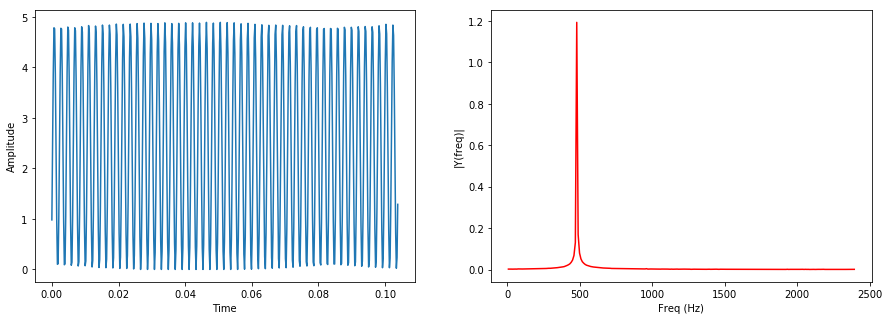

input frequency: 5.0 computed frequency: 9.615


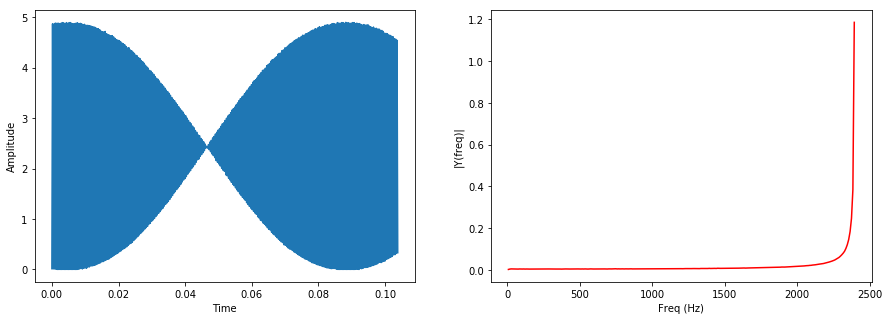

input frequency: 9.0 computed frequency: 471.13500000000005


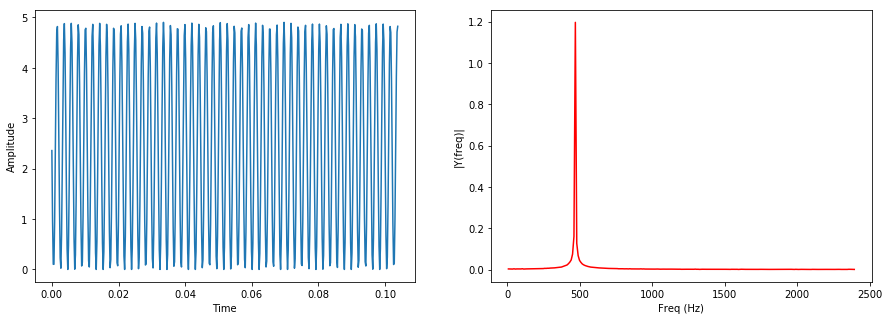

input frequency: 10.0 computed frequency: 19.23


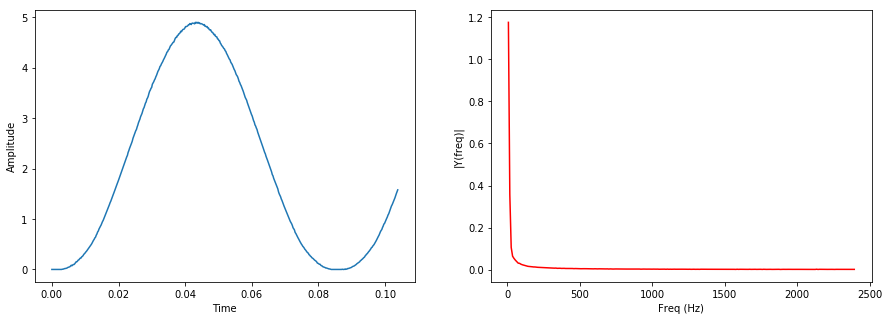

input frequency: 100.0 computed frequency: 96.15


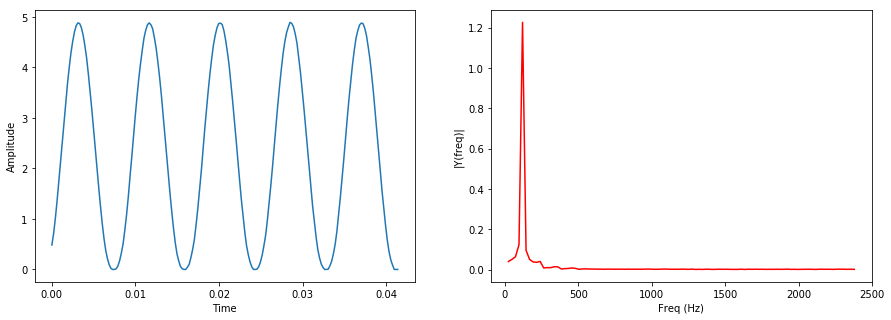

input frequency: 200.0 computed frequency: 240.375


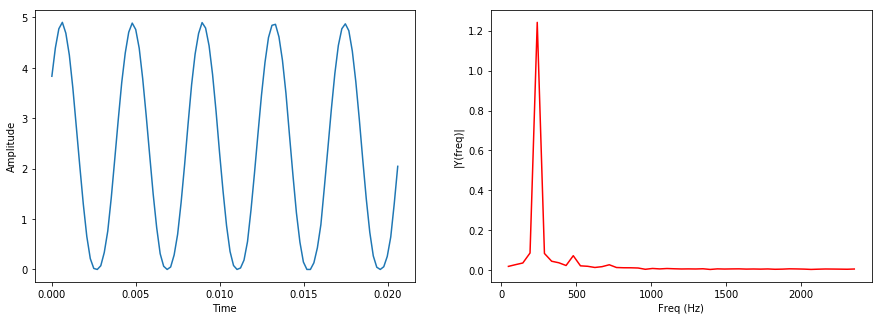

input frequency: 300.0 computed frequency: 336.52500000000003


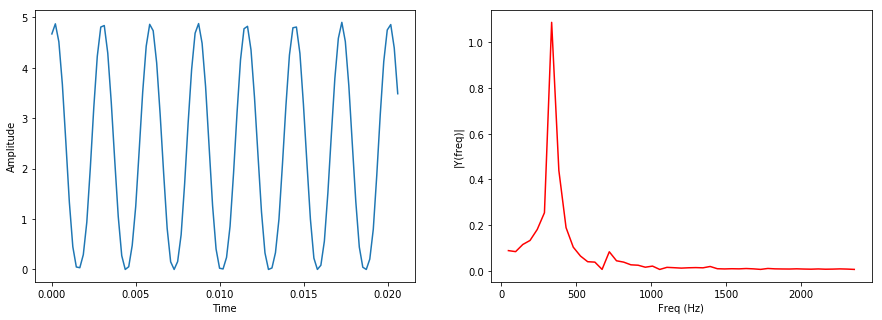

input frequency: 400.0 computed frequency: 384.6


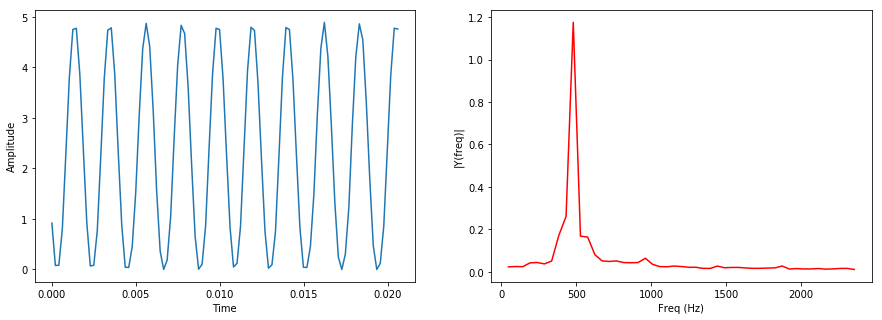

input frequency: 500.0 computed frequency: 576.9


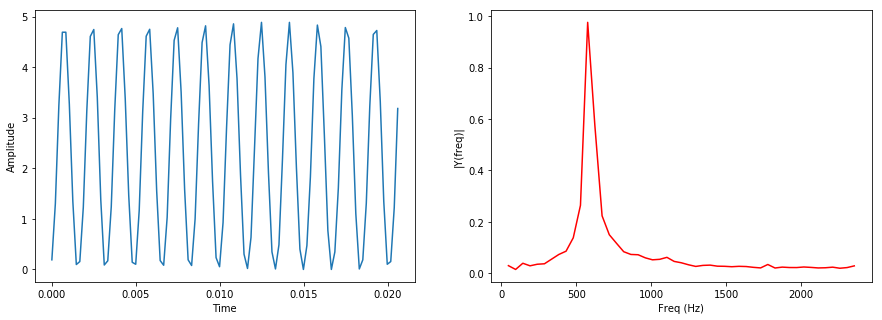

input frequency: 600.0 computed frequency: 673.0500000000001


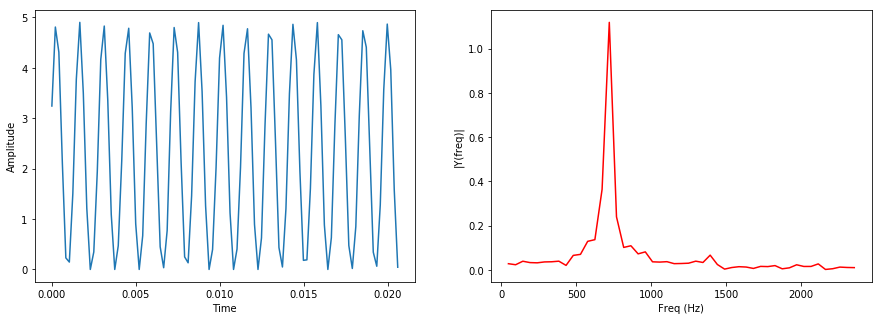

input frequency: 700.0 computed frequency: 817.275


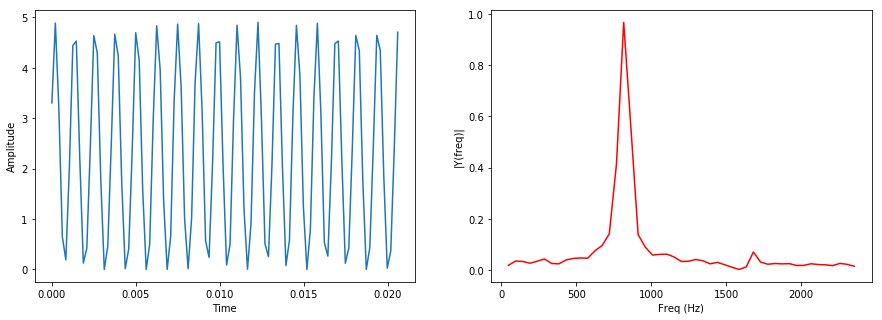

In [26]:
compfreq100=[]
Yapp=[]
Fapp=[]
for i in range(nfreq100):
    t=time100[i]/rat
    y=data100[i]/1024*5.0
    Y, frq=fourier(y)
    Yapp.append(Y)
    Fapp.append(frq)
    imax=np.argmax(Y)
    freq_max=frq[imax]
    compfreq100.append(freq_max)
    print("input frequency:",inpfreq100[i],"computed frequency:",freq_max)
    fig=plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(122)
    plt.plot(frq,abs(Y),'r') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.show()

[  1.22897756 119.54577455  10.90938967]
[[ 1.72877303e-04 -1.12282590e-03 -4.23805422e-04]
 [-1.12282590e-03  1.73790894e-01  1.61214682e-02]
 [-4.23805422e-04  1.61214682e-02  3.72384274e-02]]
[0.01314828 0.41688235 0.19297261]


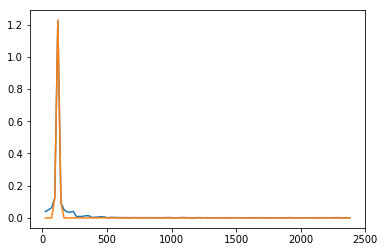

In [57]:
coef_gauss,pcov=curve_fit(gauss,Fapp[4],abs(Yapp[4]),p0=[1,compfreq100[4],10])
plt.plot(Fapp[4],abs(Yapp[4]))
plt.plot(Fapp[4],gauss(Fapp[4],coef_gauss[0],coef_gauss[1],coef_gauss[2]))
print(coef_gauss)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[  1.24198705 240.25300132  20.77582995]
[[ 3.45460177e-04 -6.57388597e-04 -1.08564463e-03]
 [-6.57388597e-04  1.90868565e+00  1.81891949e-02]
 [-1.08564463e-03  1.81891949e-02  3.59919705e-01]]
[0.01858656 1.3815519  0.59993308]


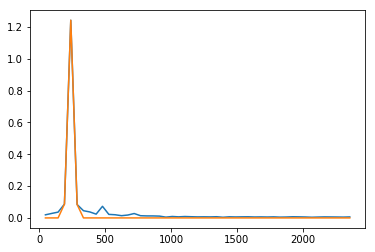

In [58]:
coef_gauss,pcov=curve_fit(gauss,Fapp[5],abs(Yapp[5]),p0=[1,compfreq100[5],10])
plt.plot(Fapp[5],abs(Yapp[5]))
plt.plot(Fapp[5],gauss(Fapp[5],coef_gauss[0],coef_gauss[1],coef_gauss[2]))
print(coef_gauss)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[  1.08842832 342.07917827  32.7303395 ]
[[ 3.18078175e-03  1.66216927e-02 -4.96350543e-02]
 [ 1.66216927e-02  5.35383710e+00 -8.02574279e-01]
 [-4.96350543e-02 -8.02574279e-01  3.41319039e+00]]
[0.05639842 2.31383601 1.84748217]


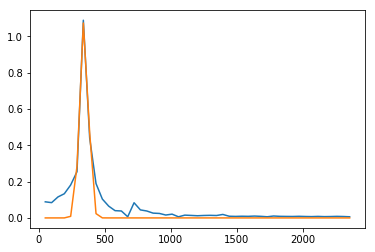

In [59]:
coef_gauss,pcov=curve_fit(gauss,Fapp[6],abs(Yapp[6]),p0=[1,compfreq100[6],10])
plt.plot(Fapp[6],abs(Yapp[6]))
plt.plot(Fapp[6],gauss(Fapp[6],coef_gauss[0],coef_gauss[1],coef_gauss[2]))
print(coef_gauss)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[  1.1820678  477.7023276   26.05063359]
[[ 2.33591540e-03 -2.23868370e-02 -1.94045546e-02]
 [-2.23868370e-02  4.75863097e+00  7.68520978e-01]
 [-1.94045546e-02  7.68520978e-01  1.62068782e+00]]
[0.04833131 2.18142865 1.27306238]


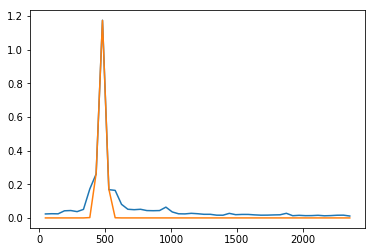

In [60]:
coef_gauss,pcov=curve_fit(gauss,Fapp[7],abs(Yapp[7]),p0=[1,compfreq100[4],10])
plt.plot(Fapp[7],abs(Yapp[7]))
plt.plot(Fapp[7],gauss(Fapp[7],coef_gauss[0],coef_gauss[1],coef_gauss[2]))
print(coef_gauss)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[  0.95056089 588.38720743  41.59392645]
[[ 3.06335531e-03  4.42107266e-03 -8.90399202e-02]
 [ 4.42107266e-03  7.86372595e+00 -3.34609451e-01]
 [-8.90399202e-02 -3.34609451e-01  7.80030706e+00]]
[0.05534759 2.80423358 2.79290298]


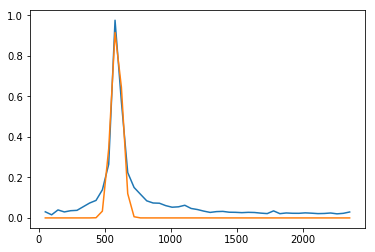

In [61]:
coef_gauss,pcov=curve_fit(gauss,Fapp[8],abs(Yapp[8]),p0=[1,compfreq100[4],10])
plt.plot(Fapp[8],abs(Yapp[8]))
plt.plot(Fapp[8],gauss(Fapp[8],coef_gauss[0],coef_gauss[1],coef_gauss[2]))
print(coef_gauss)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[  1.12411004 717.34772788 -29.89522694]
[[ 2.34695928e-03 -1.37598379e-02  2.72089017e-02]
 [-1.37598379e-02  4.06492867e+00 -5.77463772e-01]
 [ 2.72089017e-02 -5.77463772e-01  1.96013339e+00]]
[0.04844543 2.01616683 1.40004764]


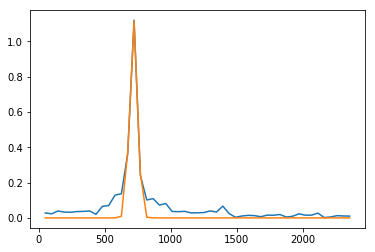

In [62]:
coef_gauss,pcov=curve_fit(gauss,Fapp[9],abs(Yapp[9]),p0=[1,compfreq100[4],10])
plt.plot(Fapp[9],abs(Yapp[9]))
plt.plot(Fapp[9],gauss(Fapp[9],coef_gauss[0],coef_gauss[1],coef_gauss[2]))
print(coef_gauss)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[  0.9400451  822.17662363  44.47370351]
[[ 1.59395032e-03  6.23235595e-04 -4.89511801e-02]
 [ 6.23235595e-04  4.86150122e+00 -5.20208088e-02]
 [-4.89511801e-02 -5.20208088e-02  4.65870674e+00]]
[0.03992431 2.20488123 2.15840375]


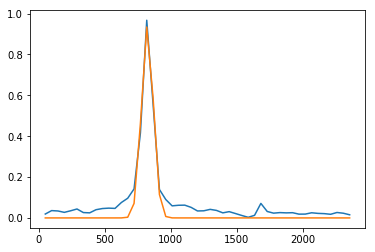

In [63]:
coef_gauss,pcov=curve_fit(gauss,Fapp[10],abs(Yapp[10]),p0=[1,compfreq100[4],10])
plt.plot(Fapp[10],abs(Yapp[10]))
plt.plot(Fapp[10],gauss(Fapp[10],coef_gauss[0],coef_gauss[1],coef_gauss[2]))
print(coef_gauss)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

In [ ]:
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot(111)
plt.plot(inpfreq10,compfreq10,'ko',linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
ax1.set_xlabel("Frequencia Generador (Hz)",fontsize=16)
ax1.set_ylabel("Frequencia DAQ (Hz)",fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

fig=plt.figure(figsize=(15,5))
ax2=plt.subplot(111)
plt.plot(inpfreq50,compfreq50,'ko',linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
ax2.set_xlabel("Frequencia Generador (Hz)",fontsize=16)
ax2.set_ylabel("Frequencia DAQ (Hz)",fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

fig=plt.figure(figsize=(15,5))
ax3=plt.subplot(111)
plt.plot(inpfreq100,compfreq100,'ko',linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
ax3.set_xlabel("Frequencia Generador (Hz)",fontsize=16)
ax3.set_ylabel("Frequencia DAQ (Hz)",fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

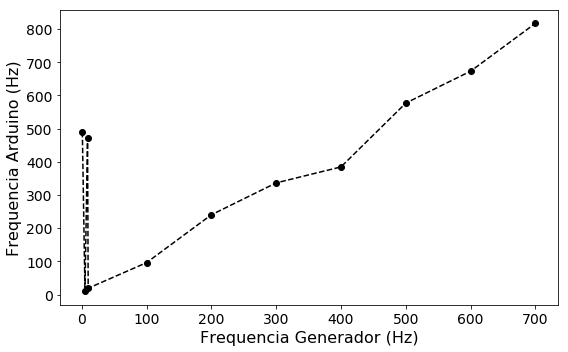

In [73]:
fig=plt.figure(figsize=(8,5))
ax3=plt.subplot(111)
plt.plot(inpfreq100,compfreq100,'ko',linestyle='dashed')
#plt.xscale("log")
#plt.yscale("log")
ax3.set_xlabel("Frequencia Generador (Hz)",fontsize=16)
ax3.set_ylabel("Frequencia Arduino (Hz)",fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig("freq_arduino.png")
plt.show()